In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [5]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

In [6]:
city_data = []

In [7]:
# Ipmort requests library
import requests
# Import API key
from config import api_key

In [8]:
# Starting URL for Weather Map API Call.
weather_api_key = api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)



http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f1425040ec0c7f39b4e453b1ab73e7a4


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all cities in the list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + cities[i]
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1

# Run an API request for each city
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the data to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Dat Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pandan
Processing Record 2 of Set 1 | ransang
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | pevek
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | padang
Processing Record 8 of Set 1 | ilulissat
Processing Record 9 of Set 1 | inirida
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | tuktoyaktuk
Processing Record 12 of Set 1 | bambanglipuro
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | puerto baquerizo moreno
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | banda aceh
Processing Record 18 of Set 1 | cabo san lucas
Processing Record 19 of Set 1 | mar del plata
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of Set 1 | hobyo
Processing Record 23

KeyboardInterrupt: 

In [ ]:
print(len(city_data))

In [ ]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

In [ ]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

In [ ]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
city_data_to_load = "weather_data/cities.csv"


In [12]:
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Albany,US,2021-11-20 02:48:05,42.6001,-73.9662,35.74,75,0,3.00
1,1,Esperance,AU,2021-11-20 02:48:07,-33.8667,121.9000,66.04,49,4,11.23
2,2,Olafsvik,IS,2021-11-20 02:48:07,64.8945,-23.7142,34.61,71,73,17.02
3,3,Fortuna,US,2021-11-20 02:48:07,40.5982,-124.1573,53.42,73,90,4.61
4,4,Floro,NO,2021-11-20 02:48:08,61.5996,5.0328,45.97,87,90,13.80
5,5,Cam Ranh,VN,2021-11-20 02:48:08,11.9214,109.1591,75.16,94,75,2.30
6,6,Nabire,ID,2021-11-20 02:48:08,-3.3667,135.4833,87.30,64,27,6.38
7,7,Rikitea,PF,2021-11-20 02:48:08,-23.1203,-134.9692,73.67,66,34,10.02
8,8,Vaini,TO,2021-11-20 02:48:09,-21.2000,-175.2000,84.36,79,20,9.22
9,9,Orlik,RU,2021-11-20 02:48:09,52.5178,99.8250,5.70,79,100,4.36


In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

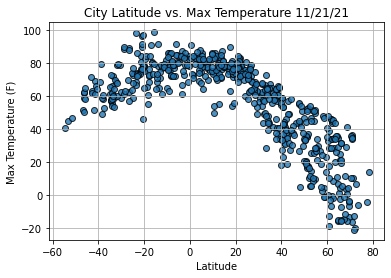

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

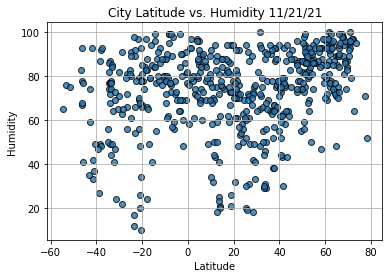

In [15]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

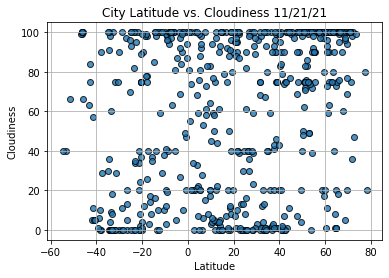

In [16]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

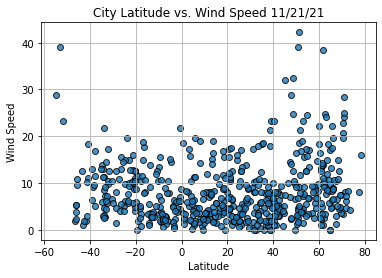

In [17]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()